# Movie Project


### Github repo:

https://github.com/akharina/dc-ds_movie_project.git


### Data directory:

    data/final : data/final/movie_dataset_df.csv.gz
    
### Figure directory:
    figure/


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

%matplotlib inline

In [40]:
#Import main dataframe 

df = pd.read_csv('data/final/movie_dataset_df.csv.gz', compression='gzip')
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45519 entries, 0 to 45518
Data columns (total 33 columns):
adult                45519 non-null bool
id                   45519 non-null int64
imdb_id              45519 non-null object
original_language    45508 non-null object
original_title       45519 non-null object
overview             44567 non-null object
popularity           45519 non-null float64
date                 45519 non-null datetime64[ns]
revenue              45519 non-null float64
runtime              45264 non-null float64
status               45438 non-null object
tagline              20435 non-null object
title                45519 non-null object
video                45519 non-null bool
vote_avg             45519 non-null float64
vote_count           45519 non-null float64
cast                 45518 non-null object
crew                 45518 non-null object
WEEK                 45519 non-null int64
MONTH                45519 non-null object
YEAR                 455

## We are working with a new movie company, which means *Small Budget*
### That is what we will focus on in this analysis

### FILTERS

In [103]:
# filter by "budget exists"
filter_1 = df["BUDGET_MIL"] > 1

# filter by "budget less than 6 mil" --> An arbitrary value that can easily be altered
filter_2 = df["BUDGET_MIL"] < 6

# filter by "revenue exists"
filter_3 = df["REVENUE_MIL"] > 1

# filter by "profitable"
filter_4 = df["PROFIT"] > 0

# filter by "recent movies" 
filter_5 = df["YEAR"] > 1999

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5]



### WHEN TO RELEASE THE MOVIE 
#### (Revenue by week of the year)

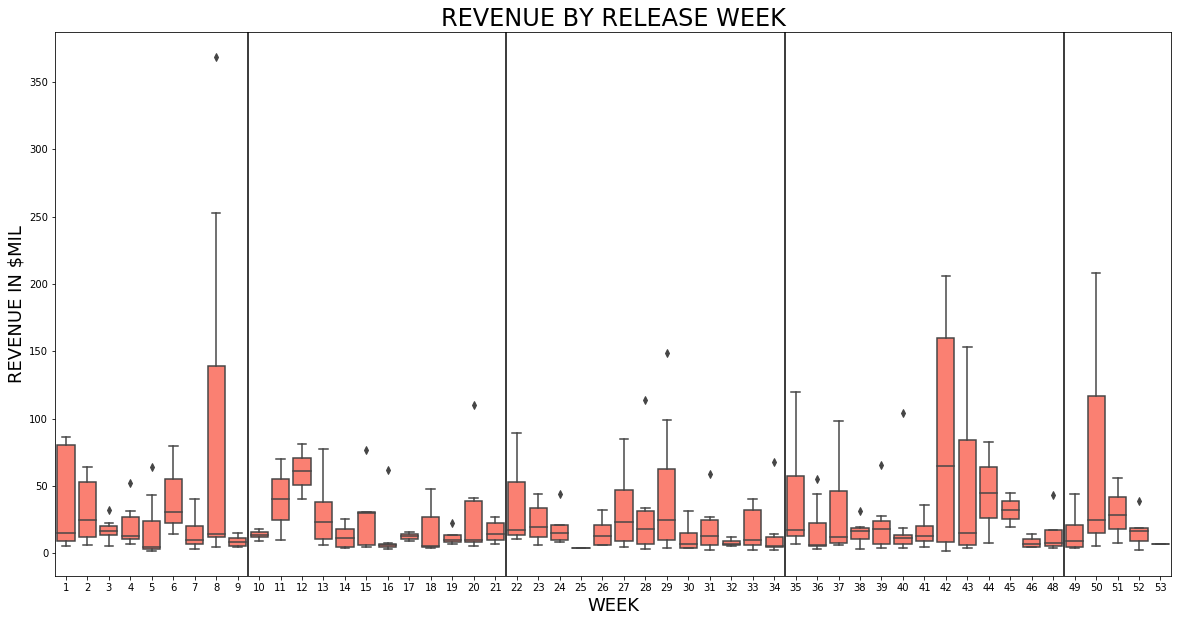

In [104]:
#Week of year vs revenue

plt.figure(figsize=(20,10))

bplot = sns.boxplot(
    x = "WEEK",
    y = "REVENUE_MIL",
    data = df_temp,
)

plt.title('REVENUE BY RELEASE WEEK', size=24)
plt.xlabel('WEEK',size=18)
plt.ylabel('REVENUE IN $MIL',size=18)

# Annotation
plt.axvline(8.5, color='k') #Start of spring
plt.axvline(20.5, color='k') #Start of summer
plt.axvline(33.5, color='k') #Start of fall
plt.axvline(46.5, color='k') #Start of winter

#Colors
for i in range(0,52):
    mybox = bplot.artists[i]
    mybox.set_facecolor("salmon")

    
plt.savefig('figures/when.png')
plt.show()



### WHERE TO PRODUCE THE MOVIE

In [105]:
df['COUNTRIES'].head()

0    ['United States of America']
1    ['United States of America']
2    ['United States of America']
3    ['United States of America']
4    ['United States of America']
Name: COUNTRIES, dtype: object

In [106]:
def _select_list_item(_list_obj):
#     print(yaml.load(_list_obj))
    try:
        return yaml.load(_list_obj)[0]
    except:
        return np.nan

df["prod_country_1"] = df["COUNTRIES"].apply(_select_list_item)
df["prod_country_1"].head()


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


0    United States of America
1    United States of America
2    United States of America
3    United States of America
4    United States of America
Name: prod_country_1, dtype: object

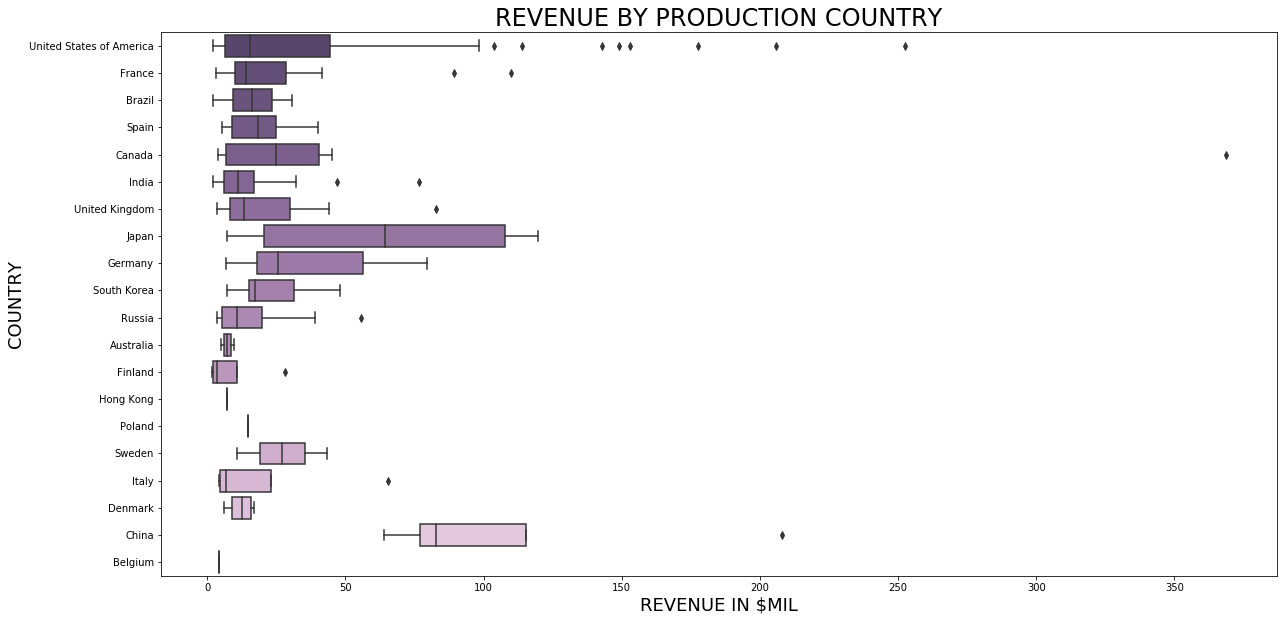

In [107]:
#Adding a filter for top producing countries
filter_6 = df['prod_country_1'].isin(list(df["prod_country_1"].value_counts().index)[:20])

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5 & filter_6]

plt.figure(figsize=(20,10))

bplot = sns.boxplot(
        data = df_temp,
        x = "REVENUE_MIL",
        y = "prod_country_1",
        palette="ch:r=.2,d=.3_r"
)

plt.title('REVENUE BY PRODUCTION COUNTRY', size=24)
plt.xlabel('REVENUE IN $MIL',size=18)
plt.ylabel('COUNTRY',size=18)


plt.savefig('figures/where.png')

plt.show()

### WHOM - Which Movie Producer to Work With or to Copy

In [108]:
def _select_list_item(_list_obj):
    try:
        return yaml.load(_list_obj)[0]
    except:
        return np.nan

df["prod_comp_1"] = df["PRODUCER"].apply(_select_list_item)
df["prod_comp_1"].head()
df["prod_comp_1"].value_counts()[:5]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


Paramount Pictures                        1002
Metro-Goldwyn-Mayer (MGM)                  854
Twentieth Century Fox Film Corporation     780
Warner Bros.                               757
Universal Pictures                         754
Name: prod_comp_1, dtype: int64

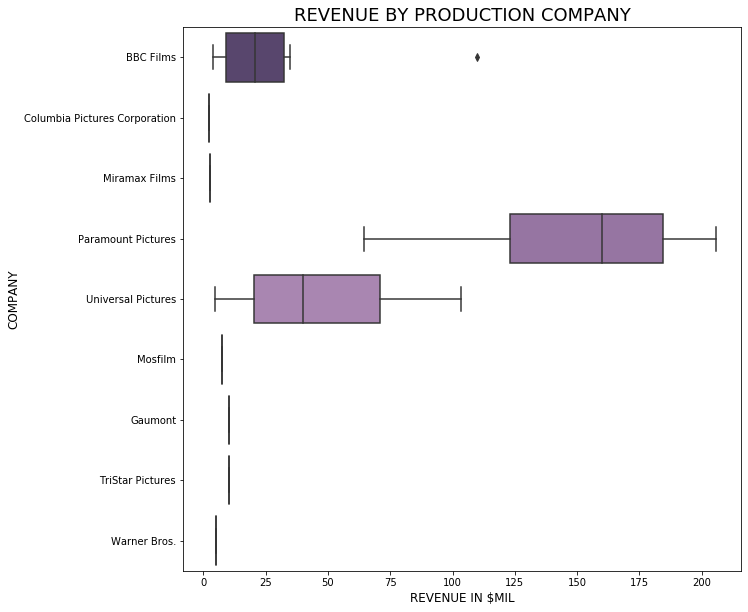

In [122]:
# filter by "top producing companies"
filter_6 = df['prod_comp_1'].isin(list(df["prod_comp_1"].value_counts().index)[:20])

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5 & filter_6]

plt.figure(figsize=(10,10))

sns.boxplot(
    data = df_temp,
    x = "REVENUE_MIL",
    y = "prod_comp_1",
    palette="ch:r=.2,d=.3_r"
)

plt.title('REVENUE BY PRODUCTION COMPANY', size=18)
plt.xlabel('REVENUE IN $MIL',size=12)
plt.ylabel('COMPANY',size=12)

plt.savefig('figures/whom.png')
plt.show()

### WHAT KIND - Which genres make the best profit

In [112]:
def _select_list_item(_list_obj):
    try:
        return yaml.load(_list_obj)[0]
    except:
        return np.nan

df["genres_1"] = df["GENRES"].apply(_select_list_item)
df["genres_1"].head()
df["genres_1"].value_counts()[:10]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


Drama          11993
Comedy          8828
Action          4495
Documentary     3419
Horror          2620
Crime           1687
Thriller        1672
Adventure       1523
Romance         1191
Animation       1122
Name: genres_1, dtype: int64

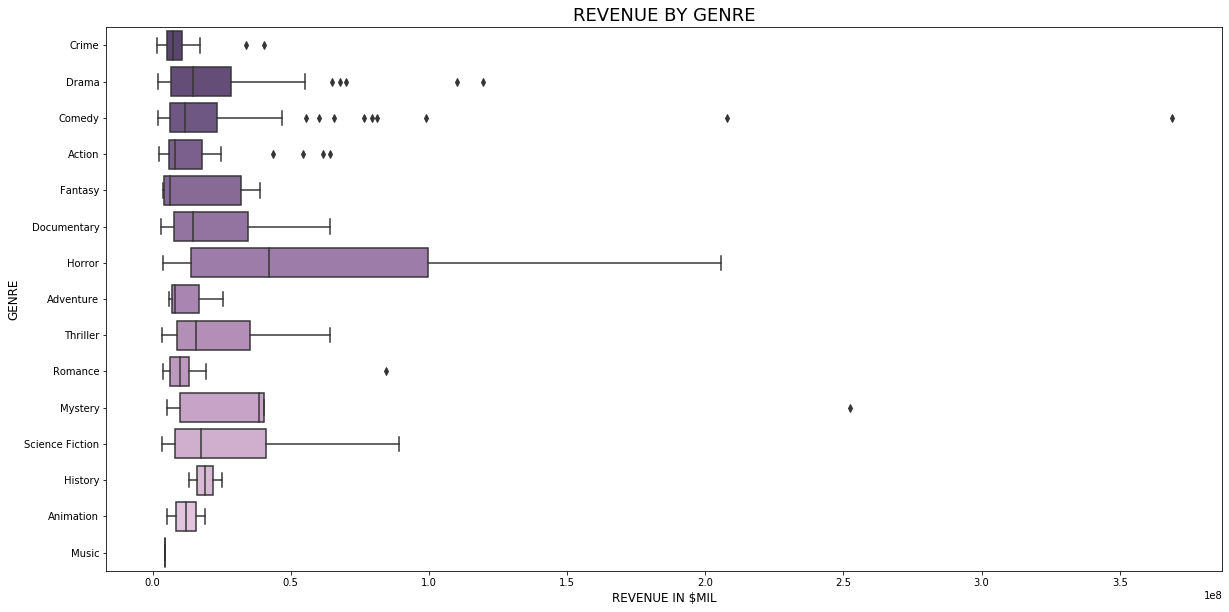

In [113]:
#Plot revenue by genre for small budget movies

df_temp = df[filter_1 & filter_2 & filter_3 & filter_4 & filter_5]

plt.figure(figsize = (20,10))

cplot = sns.boxplot(
        data = df_temp,
        x = "revenue",
        y = "genres_1",
        palette="ch:r=.2,d=.3_r"
);

plt.title('REVENUE BY GENRE', size=18)
plt.xlabel('REVENUE IN $MIL',size=12)
plt.ylabel('GENRE',size=12);


plt.savefig('figures/kind.png')